In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings(action='ignore')

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm

from sklearn.preprocessing import LabelEncoder

import fbprophet
from fbprophet import Prophet

from scipy import signal

import matplotlib as mat
print(mat.rcParams['font.family'])
plt.rc('font', family='Malgun Gothic')

['Malgun Gothic']


In [86]:
df = pd.read_excel('전력_통합(1인가구_TV).xlsx')
df

,H_ID,HA,ST_DATE,APT_TF,M2,PersonCount,PointName,H00_1,H00_2,H00_3,...,H22_4,H22_5,H22_6,H23_1,H23_2,H23_3,H23_4,H23_5,H23_6,SUM
0,9,전기밥솥,2011-12-17,비아파트,1평~19평,2인이하,전기밥솥,0.004,0.004,0.006,...,0.004,0.005,0.006,0.005,0.004,0.004,0.006,0.006,0.004,0.691
1,9,데스크탑,2011-12-17,비아파트,1평~19평,2인이하,데스크탑PC,0.020,0.021,0.010,...,0.001,0.001,0.000,0.001,0.001,0.000,0.001,0.018,0.000,0.164
2,7,데스크탑,2011-12-17,아파트,1평~19평,2인이하,데스크탑PC,0.024,0.020,0.012,...,0.001,0.001,0.000,0.001,0.001,0.001,0.000,0.001,0.001,0.161
3,9,TV,2011-12-17,비아파트,1평~19평,2인이하,TV,0.006,0.006,0.004,...,0.001,0.000,0.001,0.000,0.001,0.000,0.000,0.001,0.000,0.081
4,13,TV,2011-12-19,비아파트,1평~19평,2인이하,TV,0.012,0.011,0.011,...,0.020,0.019,0.020,0.019,0.019,0.020,0.019,0.015,0.004,1.392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6790,13,전자렌지,2012-10-14,비아파트,1평~19평,2인이하,전자렌지,0.000,0.000,0.000,...,0.001,0.000,0.002,0.000,0.001,0.000,0.001,0.001,0.000,0.073
6791,143,데스크탑,2012-10-14,비아파트,20평~29평,2인이하,데스크탑PC,0.000,0.001,0.000,...,0.001,0.000,0.001,0.000,0.000,0.001,0.000,0.001,0.000,0.058
6792,10,전기밥솥,2012-10-14,비아파트,1평~19평,2인이하,전기밥솥,0.000,0.001,0.000,...,0.000,0.001,0.003,0.000,0.001,0.000,0.000,0.001,0.000,0.057
6793,1,전자렌지,2012-10-14,아파트,20평~29평,2인이하,전자렌지,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.048


In [87]:
df['ST_DATE'] = pd.to_datetime(df['ST_DATE'])

In [88]:
le = LabelEncoder()
cols = ['HA', 'APT_TF']
for i in cols:
    df[i] = le.fit_transform(df[i])
df

,H_ID,HA,ST_DATE,APT_TF,M2,PersonCount,PointName,H00_1,H00_2,H00_3,...,H22_4,H22_5,H22_6,H23_1,H23_2,H23_3,H23_4,H23_5,H23_6,SUM
0,9,3,2011-12-17,0,1평~19평,2인이하,전기밥솥,0.004,0.004,0.006,...,0.004,0.005,0.006,0.005,0.004,0.004,0.006,0.006,0.004,0.691
1,9,1,2011-12-17,0,1평~19평,2인이하,데스크탑PC,0.020,0.021,0.010,...,0.001,0.001,0.000,0.001,0.001,0.000,0.001,0.018,0.000,0.164
2,7,1,2011-12-17,1,1평~19평,2인이하,데스크탑PC,0.024,0.020,0.012,...,0.001,0.001,0.000,0.001,0.001,0.001,0.000,0.001,0.001,0.161
3,9,0,2011-12-17,0,1평~19평,2인이하,TV,0.006,0.006,0.004,...,0.001,0.000,0.001,0.000,0.001,0.000,0.000,0.001,0.000,0.081
4,13,0,2011-12-19,0,1평~19평,2인이하,TV,0.012,0.011,0.011,...,0.020,0.019,0.020,0.019,0.019,0.020,0.019,0.015,0.004,1.392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6790,13,4,2012-10-14,0,1평~19평,2인이하,전자렌지,0.000,0.000,0.000,...,0.001,0.000,0.002,0.000,0.001,0.000,0.001,0.001,0.000,0.073
6791,143,1,2012-10-14,0,20평~29평,2인이하,데스크탑PC,0.000,0.001,0.000,...,0.001,0.000,0.001,0.000,0.000,0.001,0.000,0.001,0.000,0.058
6792,10,3,2012-10-14,0,1평~19평,2인이하,전기밥솥,0.000,0.001,0.000,...,0.000,0.001,0.003,0.000,0.001,0.000,0.000,0.001,0.000,0.057
6793,1,4,2012-10-14,1,20평~29평,2인이하,전자렌지,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.048


{'whiskers': [<matplotlib.lines.Line2D at 0x20b82da2940>,
 'caps': [<matplotlib.lines.Line2D at 0x20b82da2250>,
 'boxes': [<matplotlib.lines.Line2D at 0x20bf29b5550>],
 'medians': [<matplotlib.lines.Line2D at 0x20b81d4abe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20befa2cbb0>],
 'means': []}

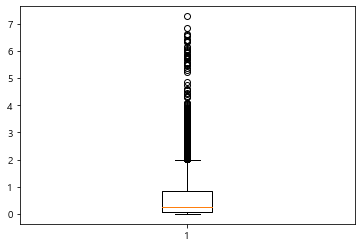

In [89]:
plt.boxplot(df['SUM'])

In [111]:
df_group = pd.DataFrame(df.groupby(['H_ID', 'ST_DATE'])['SUM'].sum())
df_group

SUM
H_ID ST_DATE          
1    2012-03-19  0.094
     2012-03-20  0.058
     2012-03-21  0.031
     2012-03-22  0.039
     2012-03-23  0.020
...                ...
258  2012-06-29  3.432
     2012-06-30  3.529
     2012-07-01  3.487
     2012-07-02  3.681
     2012-07-03  3.420

[3153 rows x 1 columns]

In [38]:
train = df[df['ST_DATE']<'2012-09-15']
test = df[df['ST_DATE']>='2012-09-15']

In [39]:
answer = test['SUM']
test = test.drop('SUM', axis=1)

In [76]:
df = df[df['SUM']<10]
df

,H_ID,HA,ST_DATE,APT_TF,M2,PersonCount,PointName,H00_1,H00_2,H00_3,...,H22_4,H22_5,H22_6,H23_1,H23_2,H23_3,H23_4,H23_5,H23_6,SUM
0,1,20,2011-12-10,1,20평~29평,2인이하,전력총합,0.033,0.030,0.028,...,0.023,0.047,0.051,0.043,0.031,0.030,0.019,0.009,0.010,4.354
1,1,20,2011-12-11,1,20평~29평,2인이하,전력총합,0.018,0.022,0.020,...,0.039,0.041,0.040,0.048,0.085,0.062,0.055,0.121,0.031,5.120
2,1,20,2011-12-12,1,20평~29평,2인이하,전력총합,0.013,0.022,0.020,...,0.096,0.062,0.026,0.020,0.011,0.010,0.015,0.022,0.022,3.176
3,1,20,2011-12-13,1,20평~29평,2인이하,전력총합,0.020,0.009,0.009,...,0.060,0.062,0.046,0.033,0.034,0.082,0.046,0.040,0.018,3.762
4,1,20,2011-12-14,1,20평~29평,2인이하,전력총합,0.008,0.011,0.023,...,0.089,0.040,0.061,0.044,0.032,0.044,0.043,0.039,0.027,3.494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15539,10,22,2012-10-14,0,1평~19평,2인이하,정수기,0.001,0.000,0.001,...,0.000,0.000,0.000,0.000,0.001,0.000,0.001,0.000,0.000,0.052
15540,1,21,2012-10-14,1,20평~29평,2인이하,전자렌지,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.048
15541,179,13,2012-10-14,0,30평~39평이상,2인이하,선풍기,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.036
15542,179,14,2012-10-14,0,30평~39평이상,2인이하,세탁기,0.000,0.001,0.000,...,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.029


In [41]:
# df.set_index('ST_DATE', inplace=True)
# df.drop(['M2', 'PointName', 'PersonCount'], axis=1, inplace=True)
# df

,H_ID,HA,APT_TF,H00_1,H00_2,H00_3,H00_4,H00_5,H00_6,H01_1,...,H22_4,H22_5,H22_6,H23_1,H23_2,H23_3,H23_4,H23_5,H23_6,SUM
ST_DATE,,,,,,,,,,,,,,,,,,,,,
2011-12-10,1,20,1,0.033,0.030,0.028,0.029,0.027,0.027,0.027,...,0.023,0.047,0.051,0.043,0.031,0.030,0.019,0.009,0.010,4.354
2011-12-11,1,20,1,0.018,0.022,0.020,0.021,0.010,0.009,0.030,...,0.039,0.041,0.040,0.048,0.085,0.062,0.055,0.121,0.031,5.120
2011-12-12,1,20,1,0.013,0.022,0.020,0.021,0.014,0.010,0.009,...,0.096,0.062,0.026,0.020,0.011,0.010,0.015,0.022,0.022,3.176
2011-12-13,1,20,1,0.020,0.009,0.009,0.019,0.021,0.022,0.014,...,0.060,0.062,0.046,0.033,0.034,0.082,0.046,0.040,0.018,3.762
2011-12-14,1,20,1,0.008,0.011,0.023,0.021,0.018,0.000,0.027,...,0.089,0.040,0.061,0.044,0.032,0.044,0.043,0.039,0.027,3.494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-14,10,22,0,0.001,0.000,0.001,0.000,0.001,0.000,0.000,...,0.000,0.000,0.000,0.000,0.001,0.000,0.001,0.000,0.000,0.052
2012-10-14,1,21,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.048
2012-10-14,179,13,0,0.000,0.000,0.000,0.000,0.000,0.000,0.005,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.036


In [42]:
mean_df = df['SUM'].resample('1D').mean()
mean_df.fillna(0)

ST_DATE
2011-12-10    4.354000
2011-12-11    5.120000
2011-12-12    3.176000
2011-12-13    3.762000
2011-12-14    3.494000
                ...   
2012-10-10    1.522771
2012-10-11    1.799744
2012-10-12    1.925293
2012-10-13    1.940643
2012-10-14    1.753646
Freq: D, Name: SUM, Length: 310, dtype: float64

<AxesSubplot:xlabel='ST_DATE'>

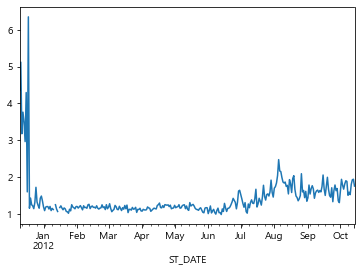

In [43]:
mean_df.plot()

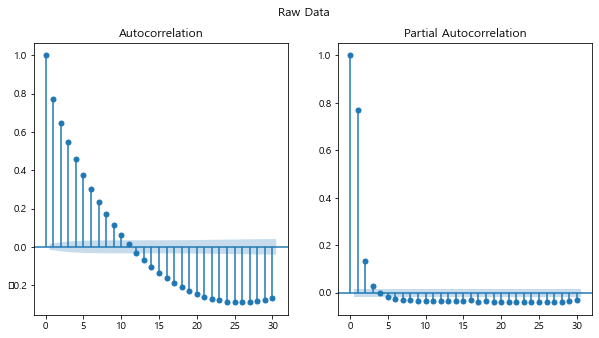

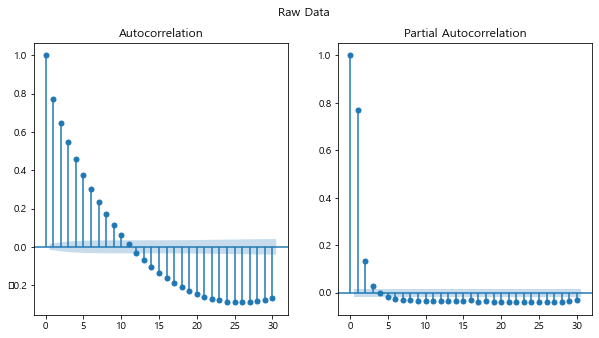

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Raw Data')
sm.graphics.tsa.plot_acf(df['SUM'].values.squeeze(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(df['SUM'].values.squeeze(), lags=30, ax=ax[1])

In [45]:
diff_df = df.copy()
diff_df['SUM'] = diff_df['SUM'].diff(2)
diff_df.dropna()
diff_df

,H_ID,HA,APT_TF,H00_1,H00_2,H00_3,H00_4,H00_5,H00_6,H01_1,...,H22_4,H22_5,H22_6,H23_1,H23_2,H23_3,H23_4,H23_5,H23_6,SUM
ST_DATE,,,,,,,,,,,,,,,,,,,,,
2011-12-10,1,20,1,0.033,0.030,0.028,0.029,0.027,0.027,0.027,...,0.023,0.047,0.051,0.043,0.031,0.030,0.019,0.009,0.010,NaN
2011-12-11,1,20,1,0.018,0.022,0.020,0.021,0.010,0.009,0.030,...,0.039,0.041,0.040,0.048,0.085,0.062,0.055,0.121,0.031,NaN
2011-12-12,1,20,1,0.013,0.022,0.020,0.021,0.014,0.010,0.009,...,0.096,0.062,0.026,0.020,0.011,0.010,0.015,0.022,0.022,-1.178
2011-12-13,1,20,1,0.020,0.009,0.009,0.019,0.021,0.022,0.014,...,0.060,0.062,0.046,0.033,0.034,0.082,0.046,0.040,0.018,-1.358
2011-12-14,1,20,1,0.008,0.011,0.023,0.021,0.018,0.000,0.027,...,0.089,0.040,0.061,0.044,0.032,0.044,0.043,0.039,0.027,0.318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-14,10,22,0,0.001,0.000,0.001,0.000,0.001,0.000,0.000,...,0.000,0.000,0.000,0.000,0.001,0.000,0.001,0.000,0.000,-0.006
2012-10-14,1,21,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.009
2012-10-14,179,13,0,0.000,0.000,0.000,0.000,0.000,0.000,0.005,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.016


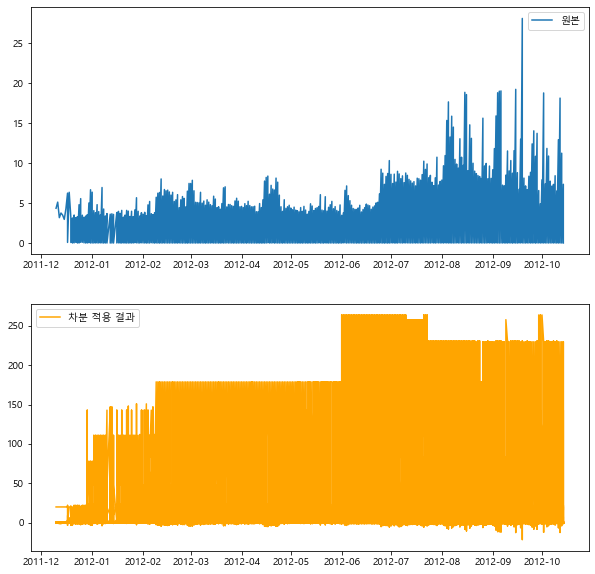

In [46]:
#차분 적용결과가 정상성을 띄는지 확인
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(df['SUM'])
plt.legend(['원본'])
plt.subplot(212)
plt.plot(diff_df,'orange')
plt.legend(['차분 적용 결과'])

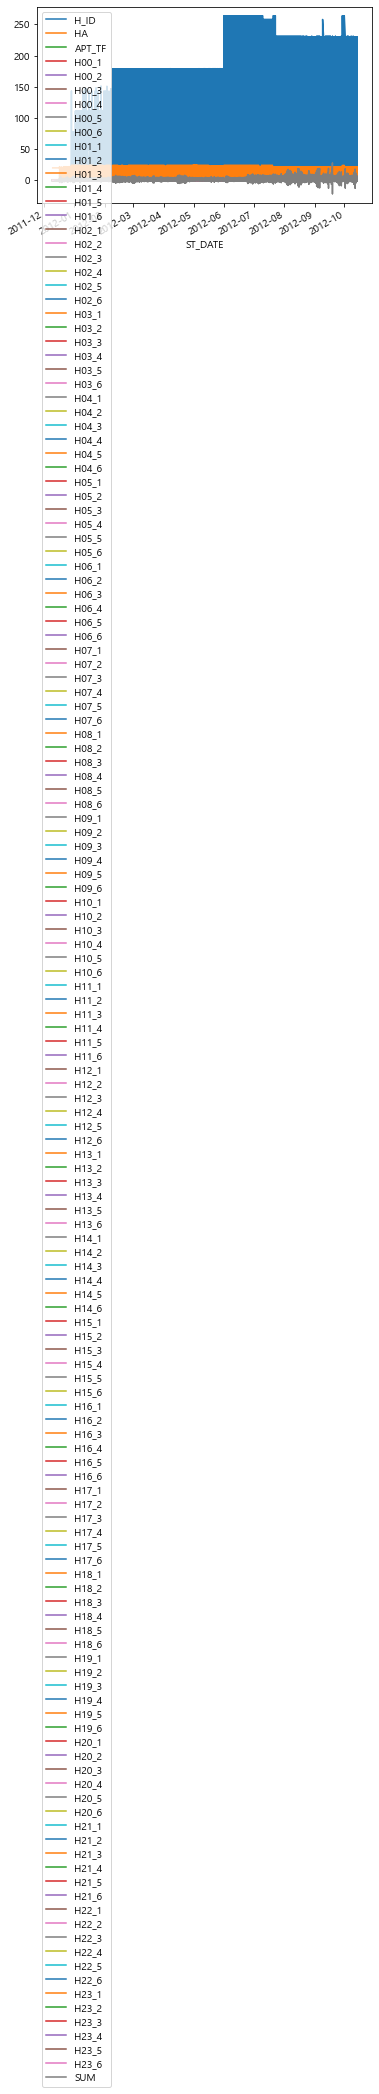

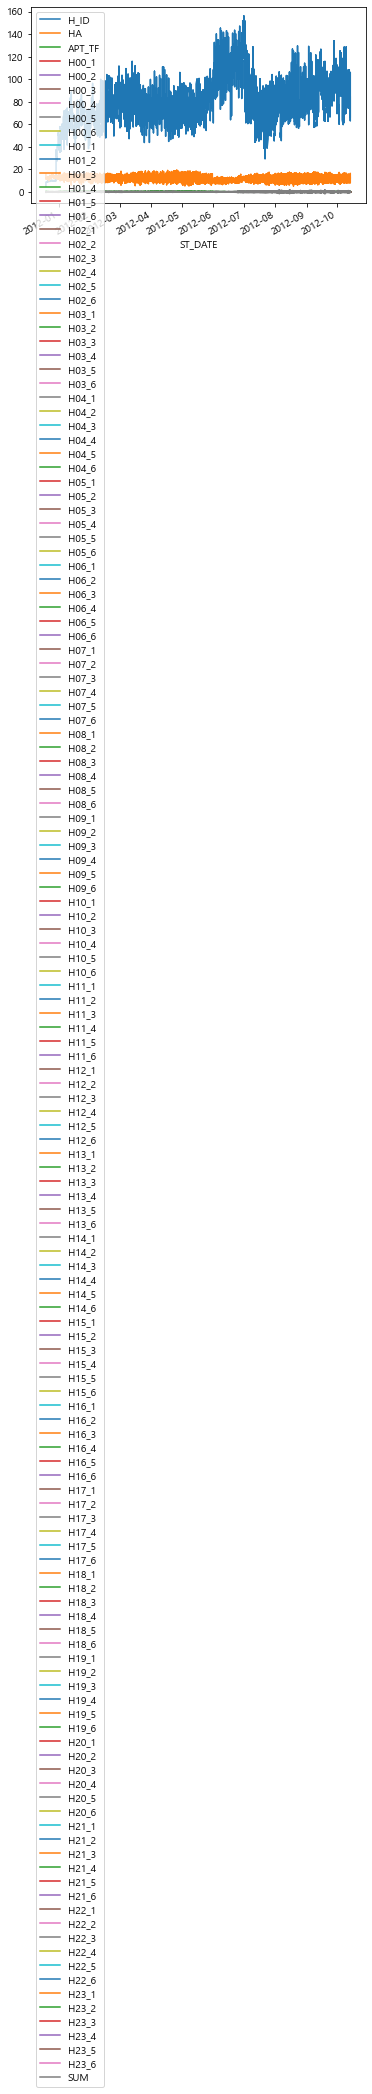

In [47]:
diff_df.plot()
diff_df.rolling(20).mean().plot()
plt.show()

KeyError: 'total'

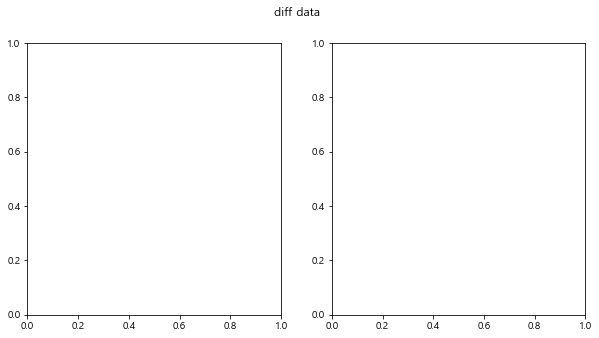

In [48]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('diff data')
sm.graphics.tsa.plot_acf(diff_df['total'].values.squeeze(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff_df['total'].values.squeeze(), lags=30, ax=ax[1])
#acf - die out, pacf - cut off (주관적 판단) - AR모델 적용

In [274]:
train.iloc[:,0:148]

,H_ID,HA,ST_DATE,APT_TF,H00_1,H00_2,H00_3,H00_4,H00_5,H00_6,...,H22_3,H22_4,H22_5,H22_6,H23_1,H23_2,H23_3,H23_4,H23_5,H23_6
0,1,0,2011-12-10,1,0.033,0.030,0.028,0.029,0.027,0.027,...,0.060,0.023,0.047,0.051,0.043,0.031,0.030,0.019,0.009,0.010
1,1,0,2011-12-11,1,0.018,0.022,0.020,0.021,0.010,0.009,...,0.038,0.039,0.041,0.040,0.048,0.085,0.062,0.055,0.121,0.031
2,1,0,2011-12-12,1,0.013,0.022,0.020,0.021,0.014,0.010,...,0.064,0.096,0.062,0.026,0.020,0.011,0.010,0.015,0.022,0.022
3,1,0,2011-12-13,1,0.020,0.009,0.009,0.019,0.021,0.022,...,0.063,0.060,0.062,0.046,0.033,0.034,0.082,0.046,0.040,0.018
4,1,0,2011-12-14,1,0.008,0.011,0.023,0.021,0.018,0.000,...,0.045,0.089,0.040,0.061,0.044,0.032,0.044,0.043,0.039,0.027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6728,231,0,2012-09-14,0,0.051,0.044,0.044,0.030,0.041,0.035,...,0.013,0.031,0.042,0.012,0.016,0.024,0.027,0.018,0.013,0.020
6729,245,0,2012-09-14,0,0.060,0.060,0.044,0.066,0.044,0.055,...,0.052,0.069,0.053,0.057,0.090,0.056,0.063,0.049,0.043,0.041
6730,246,0,2012-09-14,0,0.055,0.078,0.041,0.057,0.054,0.055,...,0.054,0.061,0.060,0.053,0.092,0.060,0.055,0.048,0.043,0.035
6731,247,0,2012-09-14,1,0.141,0.151,0.092,0.083,0.085,0.094,...,0.089,0.086,0.086,0.112,0.098,0.100,0.128,0.131,0.114,0.102


In [115]:
df2 = df.copy()
df2.drop(df2.iloc[:,0:152], axis=1, inplace=True)
df2['ds'] = df['ST_DATE']
df2['y'] = df['SUM']
df2

,ds,y
0,2011-12-17,0.691
1,2011-12-17,0.164
2,2011-12-17,0.161
3,2011-12-17,0.081
4,2011-12-19,1.392
...,...,...
6790,2012-10-14,0.073
6791,2012-10-14,0.058
6792,2012-10-14,0.057
6793,2012-10-14,0.048


In [116]:
# 데이터 타입 변경
df2['ds']= pd.to_datetime(df2['ds'])

#상한, 하한값 지정
# df2['cap'] = 20
# df2['floor'] = 1.5

# 모델 생성
model = Prophet()

# 모델 학습
model.fit(df2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [92]:
future = model.make_future_dataframe(periods=30)
future.tail()

,ds
325,2012-11-09
326,2012-11-10
327,2012-11-11
328,2012-11-12
329,2012-11-13


In [93]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
325,2012-11-09,0.531170,-0.422842,1.560202
326,2012-11-10,0.594820,-0.286829,1.539164
327,2012-11-11,0.610683,-0.280361,1.597284
328,2012-11-12,0.493947,-0.489455,1.416752
329,2012-11-13,0.497050,-0.427240,1.529184


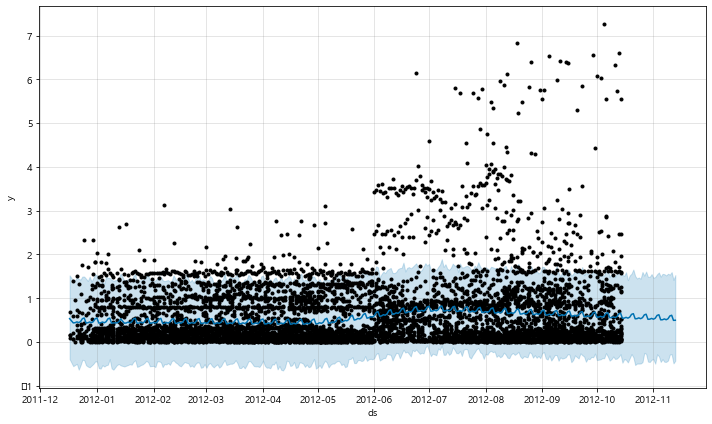

In [94]:
fig1 = model.plot(forecast)

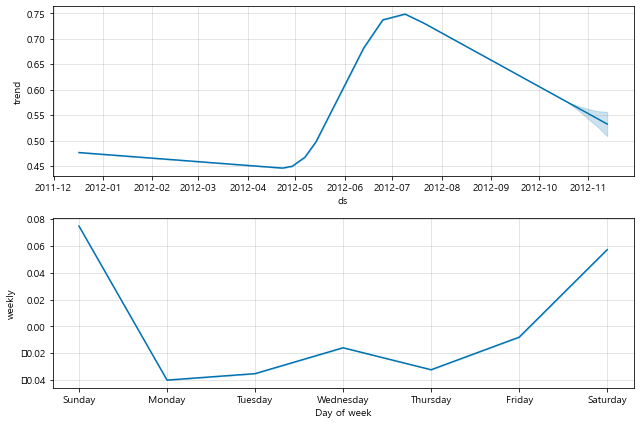

In [95]:
fig2 = model.plot_components(forecast)

In [96]:
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model, forecast)

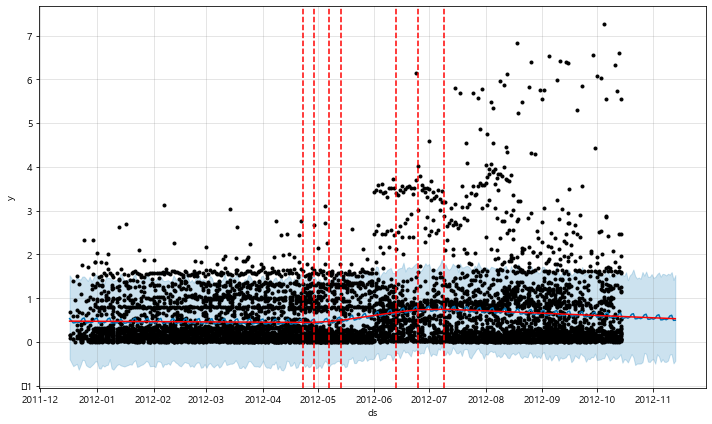

In [97]:
#Prophet은 기본적으로 추세선을 자동으로 감지하여 추후의 트렌드를 예측하는 모델
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

In [69]:
# train set 마지막 1년 날짜 생성
last_8m = list()
for i in range(1, 9):
    last_8m.append(['2012-%1d' % i])
last_8m = pd.DataFrame(last_8m, columns = ['ds'])
last_8m['ds']= pd.to_datetime(last_8m['ds'])

In [70]:
# last_8m['cap'] = 20
# last_8m['floor'] = 1.5

In [71]:
forecast = model.predict(last_8m)

In [72]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-01,1.235719,-0.787074,3.431711,1.235719,1.235719,0.084457,0.084457,0.084457,0.084457,0.084457,0.084457,0.0,0.0,0.0,1.320177
1,2012-02-01,1.173330,-0.995942,3.271970,1.173330,1.173330,-0.010890,-0.010890,-0.010890,-0.010890,-0.010890,-0.010890,0.0,0.0,0.0,1.162441
2,2012-03-01,1.167155,-0.975653,3.136775,1.167155,1.167155,-0.010387,-0.010387,-0.010387,-0.010387,-0.010387,-0.010387,0.0,0.0,0.0,1.156767
3,2012-04-01,1.160729,-0.816113,3.390381,1.160729,1.160729,0.084457,0.084457,0.084457,0.084457,0.084457,0.084457,0.0,0.0,0.0,1.245186
4,2012-05-01,1.154487,-1.070234,3.338010,1.154487,1.154487,-0.017289,-0.017289,-0.017289,-0.017289,-0.017289,-0.017289,0.0,0.0,0.0,1.137199
5,2012-06-01,1.144519,-0.939475,3.219171,1.144519,1.144519,-0.022911,-0.022911,-0.022911,-0.022911,-0.022911,-0.022911,0.0,0.0,0.0,1.121608
6,2012-07-01,1.330469,-0.658461,3.585458,1.330469,1.330469,0.084457,0.084457,0.084457,0.084457,0.084457,0.084457,0.0,0.0,0.0,1.414926
7,2012-08-01,1.673845,-0.429603,3.678517,1.673845,1.673845,-0.010890,-0.010890,-0.010890,-0.010890,-0.010890,-0.010890,0.0,0.0,0.0,1.662956


In [73]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds      yhat  yhat_lower  yhat_upper
0 2012-01-01  1.320177   -0.787074    3.431711
1 2012-02-01  1.162441   -0.995942    3.271970
2 2012-03-01  1.156767   -0.975653    3.136775
3 2012-04-01  1.245186   -0.816113    3.390381
4 2012-05-01  1.137199   -1.070234    3.338010


In [74]:
forecast['yhat'].mean()*1.5

1.9164861982459158

In [75]:
5.751794*2

11.503588

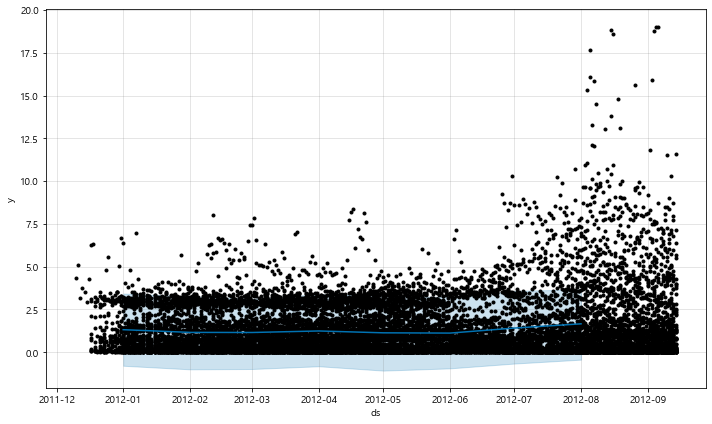

In [76]:
from matplotlib import pyplot
model.plot(forecast)
pyplot.show()

In [77]:
last_2m = list()
for i in range(9, 11):
    last_2m.append(['2012-%9d' % i])
last_2m = pd.DataFrame(last_2m, columns = ['ds'])
last_2m['ds']= pd.to_datetime(last_2m['ds'])

In [22]:
# last_2m['cap'] = 20
# last_2m['floor'] = 1.5

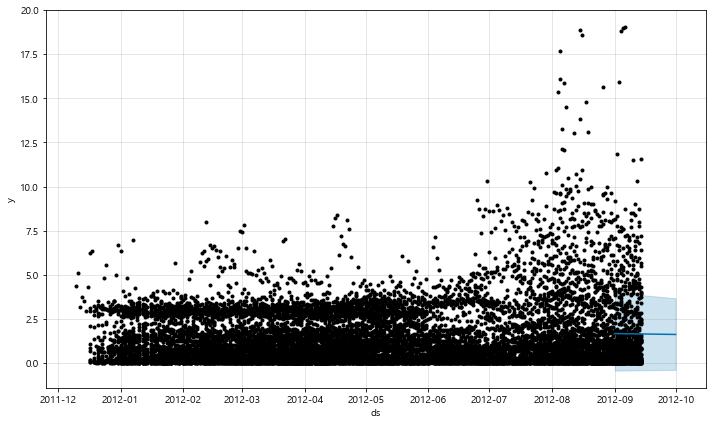

In [78]:
forecast = model.predict(last_2m)
model.plot(forecast)
pyplot.show()

In [24]:
last_all = list()
for i in range(1, 11):
    last_all.append(['2012-%9d' % i])
last_all = pd.DataFrame(last_all, columns = ['ds'])
last_all['ds']= pd.to_datetime(last_all['ds'])

In [25]:
last_all['cap'] = 20
last_all['floor'] = 1.5

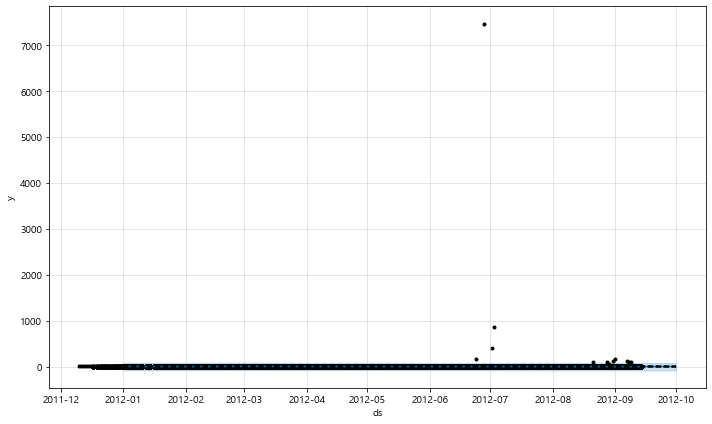

In [26]:
forecast = model.predict(last_all)
model.plot(forecast)
pyplot.show()

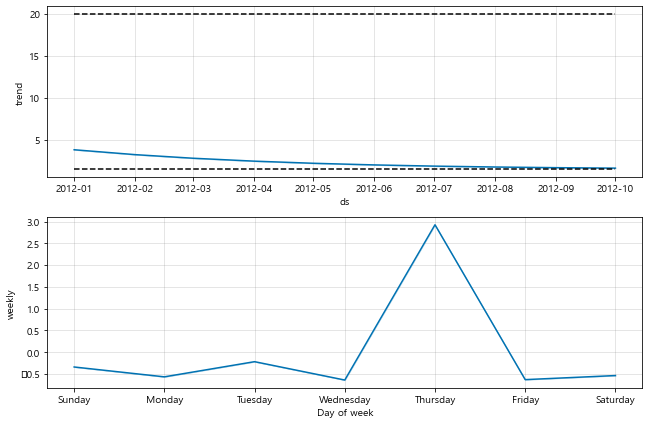

In [27]:
fig2 = model.plot_components(forecast)